# Behaviour analysis of bonsai VR

In [149]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [139]:
mouse_id = "005"
date = "20251027"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-005/ses-4LM015_date-20251027T143003


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [140]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [111]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

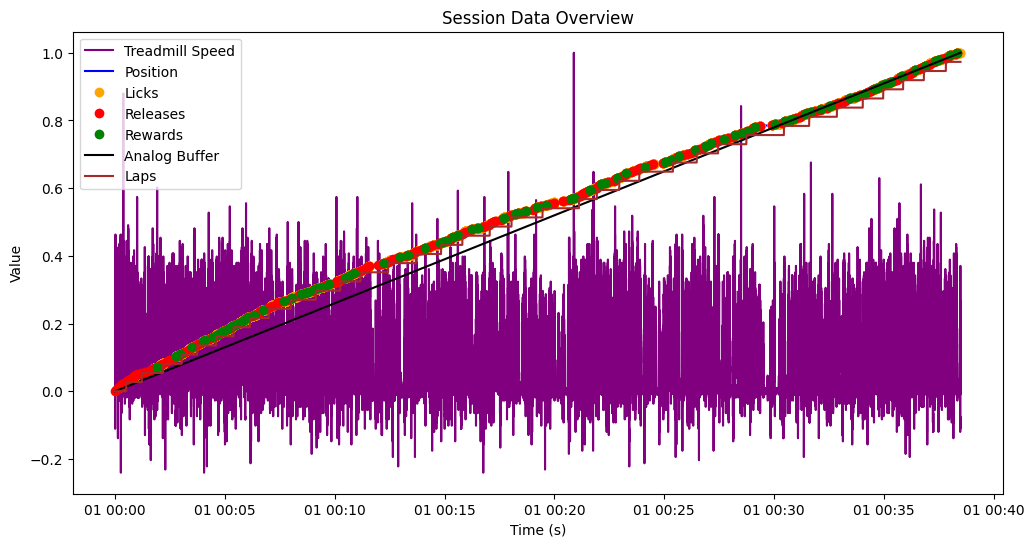

In [112]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [113]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 5332
Total Landmarks: 293
Total Rewards: 90
Hit Rate: 93.18%, False Alarm Rate: 20.55%, D-prime: 1.72
Targets Licked: 205 of 220, Distractors Licked: 15 of 73
rewarded odours: ['odour11' 'odour18' 'odour19'], rewarded textures: ['grass' 'light_squares' 'waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']


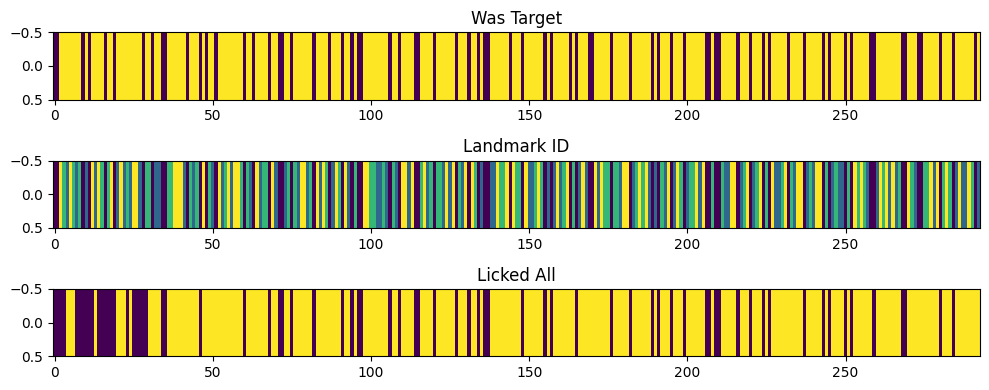

In [114]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

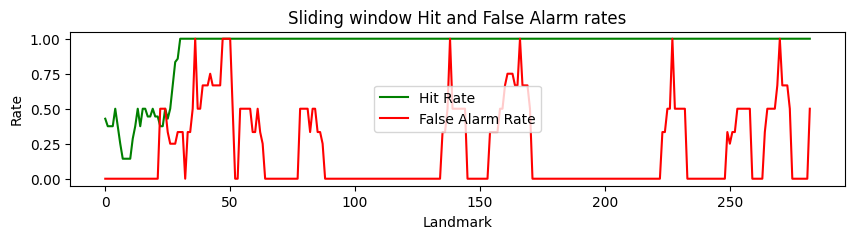

In [115]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

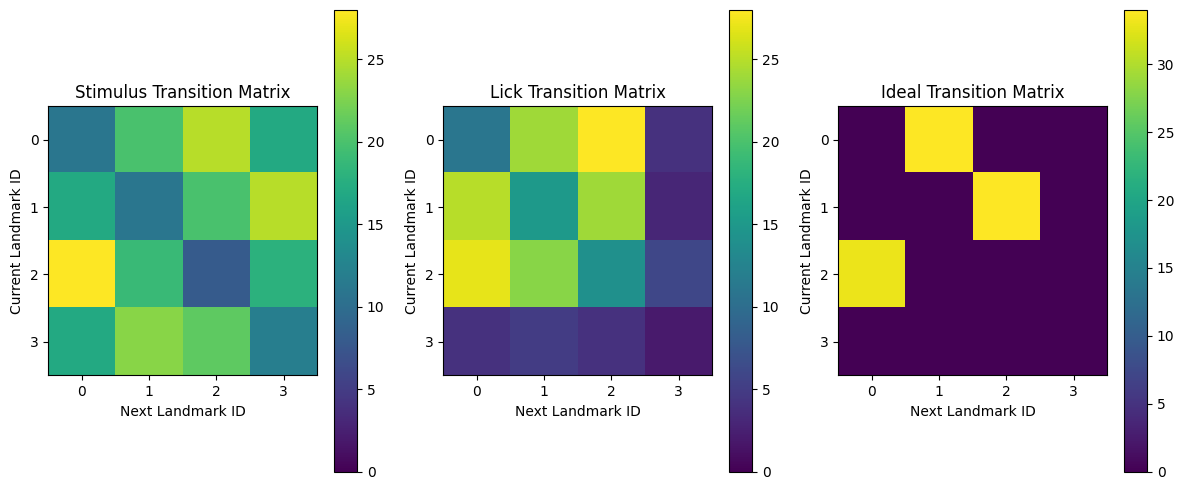

In [136]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

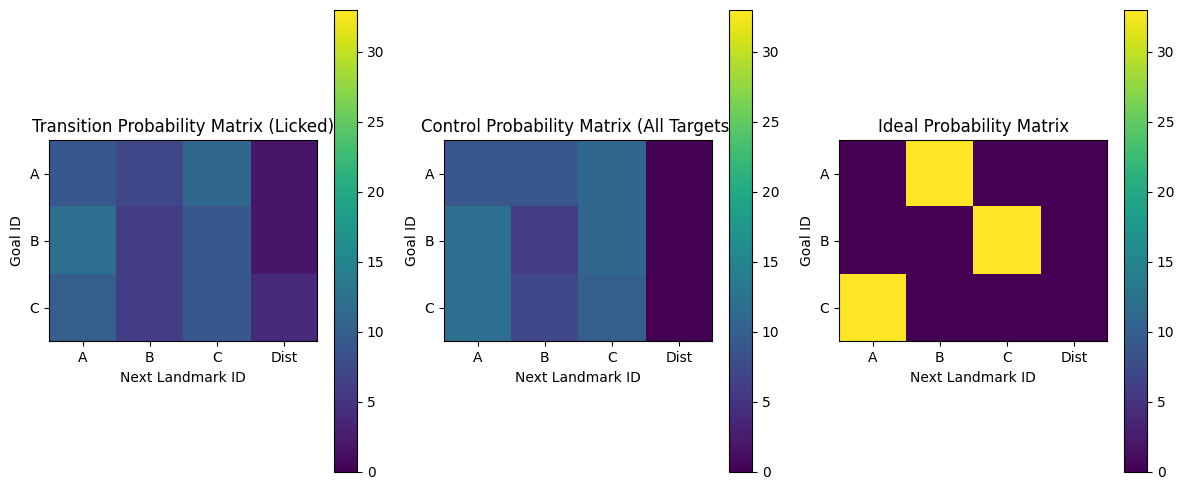

In [143]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

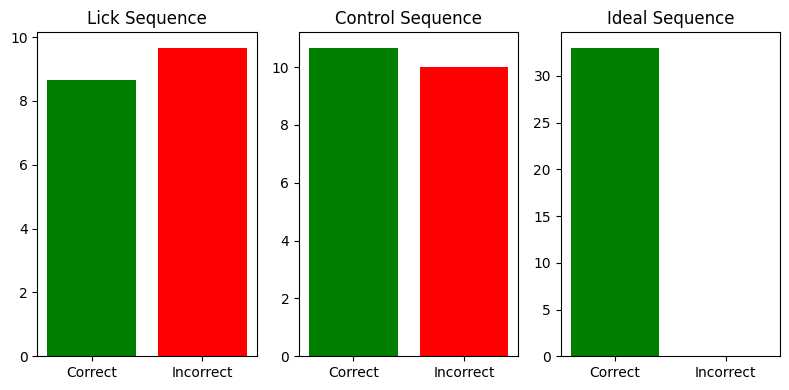

In [144]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

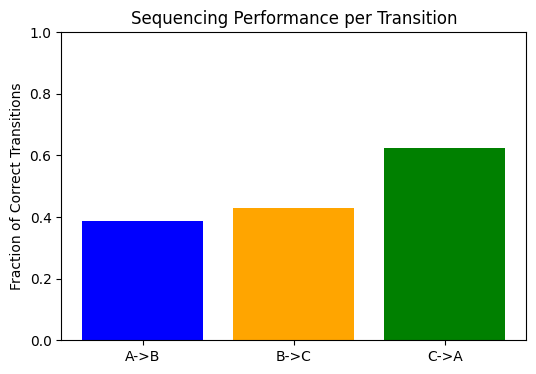

Sequencing Performance: 48.08%


0.4808201058201058

In [156]:
parse_bonsai_functions.calc_seq_fraction(sess_dataframe,ses_settings,test='transition') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

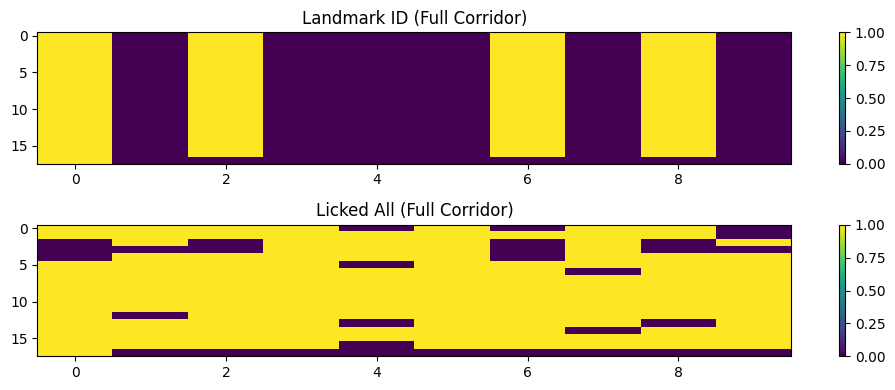

In [95]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)